In [1]:
import os
import sys
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pmdarima as pm
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity='all'
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('UCI_Credit_card.csv')
df.head()
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
# check N/A
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Text(0.5, 1.0, 'credit default')

<AxesSubplot:title={'center':'credit default'}>

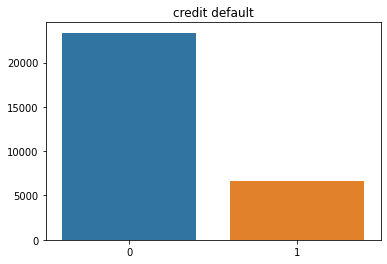

In [4]:
# 查看正负样本个数
default_count = df['default.payment.next.month'].value_counts()
plt.title('credit default')
sns.barplot(x=default_count.index.values, y=default_count.values)

In [5]:
# 对样本进行重采样，使正负样本均衡
test = df['default.payment.next.month']
default_0_indexes = df[df['default.payment.next.month'] == 0].index.values
sampled_0_indexes = np.random.choice(default_0_indexes, default_count[1])
sampled_1_indexes = df[df['default.payment.next.month'] == 1].index.values
sampled = np.append(sampled_0_indexes, sampled_1_indexes)
sampled

array([18911, 22355, 13665, ..., 29997, 29998, 29999], dtype=int64)

Text(0.5, 1.0, 'credit default')

<AxesSubplot:title={'center':'credit default'}>

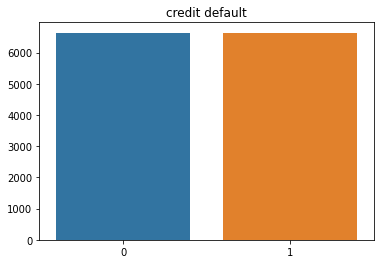

In [6]:
df_sampled = df.iloc[sampled]
# 查看重新采样后的正负样本个数
default_count = df_sampled['default.payment.next.month'].value_counts()
plt.title('credit default')
sns.barplot(x=default_count.index.values, y=default_count.values)

In [7]:
# create train & test dataset
df_X = df_sampled.drop(['ID','AGE', 'AGE', 'default.payment.next.month'], axis=1)
df_y = df_sampled['default.payment.next.month']
train_x, test_x, train_y, test_y = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

In [8]:
# initialize classifiers & params
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]
classifier_param_grid = [
    {'svc__C':[1], 'svc__gamma':[0.1]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]} ,
    {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [9]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, scoring='accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=model_param_grid, scoring=scoring)
    search = gridsearch.fit(train_x, train_y)
    predict_y = gridsearch.predict(test_x)
    score = accuracy_score(test_y, predict_y)
    print('=' * 100)
    print('best param: ', search.best_params_)
    print('best score: ', search.best_score_)
    print('accuracy_score: ', score)
    return predict_y, score

In [10]:
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    predict_y, score = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , scoring='accuracy')

best param:  {'svc__C': 1, 'svc__gamma': 0.1}
best score:  0.700386716022968
accuracy_score:  0.7020715630885123
best param:  {'decisiontreeclassifier__max_depth': 6}
best score:  0.6952997082442941
accuracy_score:  0.6892655367231638
best param:  {'randomforestclassifier__n_estimators': 6}
best score:  0.6898372501692077
accuracy_score:  0.6952919020715631
best param:  {'kneighborsclassifier__n_neighbors': 8}
best score:  0.6764633247376727
accuracy_score:  0.6862523540489642
